# [8주차] 분류의 시작: 로지스틱 회귀 모델 만들기 🎯

안녕하세요! 8주차 수업에 오신 것을 환영합니다.  
지난 시간에는 연속된 숫자 값을 예측하는 **회귀(Regression)** 문제를  
선형 회귀 모델로 해결하는 실습을 진행했습니다.

오늘은 머신러닝의 또 다른 주요 문제 유형인 **분류(Classification)** 에 대해 알아봅니다.  
주어진 데이터를 정해진 카테고리 중 하나로 구분하는 것이 목표입니다.

가장 기초적이면서도 중요한 분류 모델인 **로지스틱 회귀(Logistic Regression)** 를  
`scikit-learn`을 이용해 직접 구현하고 평가해 보겠습니다.

## 🤔 모듈 1: 왜 선형 회귀로는 부족할까? (분류 문제)

**분류 문제란?** - 데이터를 미리 정해진 **범주(Category)** 중 하나로 나누는 문제입니다.  
- 예: 스팸 메일인가 아닌가? (이진 분류), 사진 속 동물이 개/고양이/새 인가? (다중 분류)

**선형 회귀의 한계**:  
- 선형 회귀는 **연속적인 숫자**를 예측하도록 설계되었습니다. ($y = Wx + b$)  
- 예측 결과가 $(-\infty, +\infty)$ 범위로 나올 수 있습니다.  
- 분류 문제 (e.g., 0 또는 1)에 적용하면, 예측값이 0.5, 1.7, -0.2 처럼  
  범주를 벗어나는 의미 없는 값이 나올 수 있습니다.

따라서 분류 문제에는 **출력값을 특정 범위(e.g., 0과 1 사이)로** 만들어주는 새로운 모델이 필요합니다.

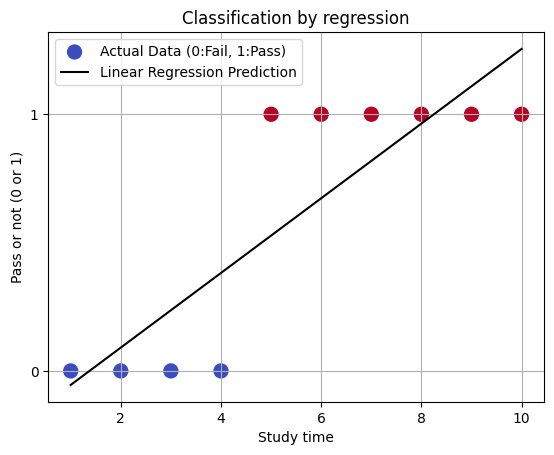

결과 해석:
- 예측 직선이 y=0과 y=1 범위를 크게 벗어납니다.
- 예를 들어 공부 시간이 1시간일 때 예측값은 0보다 작고,
  10시간일 때는 1보다 큰 값이 나옵니다.
=> 즉, 분류 문제에 직접 적용하기 부적합합니다.


In [2]:
# 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 가상의 분류 데이터 생성 (공부 시간에 따른 합격/불합격)
# 공부 시간 (특징 X)
study_hours = np.array(
    [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]
    )
# 합격 여부 (정답 y, 0: 불합격, 1: 합격)
pass_fail = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

# 선형 회귀 모델로 학습 시도
linear_model = LinearRegression()
linear_model.fit(study_hours, pass_fail)

# 결과 시각화
plt.scatter(study_hours, pass_fail,
            c=pass_fail, cmap='coolwarm', s=100,
            label='Actual Data (0:Fail, 1:Pass)')
# 선형 회귀 모델의 예측 직선
plt.plot(study_hours, linear_model.predict(study_hours),
         color='black', label='Linear Regression Prediction')

plt.title("Classification by regression")
plt.xlabel("Study time")
plt.ylabel("Pass or not (0 or 1)")
plt.yticks([0, 1]) # y축 눈금을 0과 1로 고정
plt.legend()
plt.grid(True)
plt.show()

print("결과 해석:")
print("- 예측 직선이 y=0과 y=1 범위를 크게 벗어납니다.")
print("- 예를 들어 공부 시간이 1시간일 때 예측값은 0보다 작고,")
print("  10시간일 때는 1보다 큰 값이 나옵니다.")
print("=> 즉, 분류 문제에 직접 적용하기 부적합합니다.")

## 모듈 2: 로지스틱 회귀와 시그모이드(Sigmoid, $\sigma$) 함수

**로지스틱 회귀 (Logistic Regression)**:  
- 이름에 '회귀'가 있지만, 실제로는 **분류**를 위한 모델입니다.  
- 선형 회귀의 예측값 $(z = Wx+b)$를 **시그모이드(Sigmoid)** 함수에 통과시켜  
  출력값을 **0과 1 사이의 확률값**으로 변환합니다.

**시그모이드 함수**:  
- $\sigma(z) = \frac{1}{1 + e^{-z}}$ (여기서 $z = Wx+b$)  
- $e$는 자연상수(약 2.718)이며, $e^{-z}$는 $z$가 커질수록 0에 가까워지고,  
$z$가 작아질수록 무한대에 가까워지는 특성을 가집니다.  
- 이 특성 때문에 $z$가 매우 커지면 분모는 $1+0=1$이 되어 $\sigma(z) \approx 1$이 되고,  
  $z$가 매우 작아지면 분모는 $1+\infty=\infty$가 되어 $\sigma(z) \approx 0$이 됩니다.  
- 이것이 시그모이드 함수가 항상 0과 1 사이의 S자 곡선 형태를 가지는 이유입니다.  

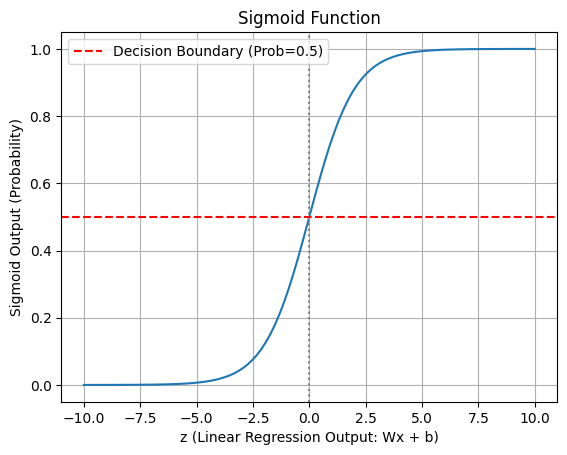

결과 해석:
- 선형 회귀의 결과(z)가 아무리 커져도 확률은 1에 수렴합니다.
- 결과(z)가 아무리 작아져도 확률은 0에 수렴합니다.
- 결과(z)가 0일 때, 확률은 정확히 0.5가 됩니다.


In [3]:
# 시그모이드 함수 정의
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

# z 값의 범위 생성 (-10 ~ 10)
z = np.linspace(-10, 10, 100)
# 각 z 값에 대한 시그모이드 함수 결과 계산
sigma_z = sigmoid(z)

# 시그모이드 함수 그래프 그리기
plt.plot(z, sigma_z)
plt.title("Sigmoid Function")
plt.xlabel("z (Linear Regression Output: Wx + b)")
plt.ylabel("Sigmoid Output (Probability)")
plt.grid(True)
# 확률값이 0.5가 되는 지점(z=0)에 선 표시
plt.axhline(y=0.5, color='red', linestyle='--',
            label='Decision Boundary (Prob=0.5)')
plt.axvline(x=0, color='gray', linestyle=':')
plt.legend()
plt.show()

print("결과 해석:")
print("- 선형 회귀의 결과(z)가 아무리 커져도 확률은 1에 수렴합니다.")
print("- 결과(z)가 아무리 작아져도 확률은 0에 수렴합니다.")
print("- 결과(z)가 0일 때, 확률은 정확히 0.5가 됩니다.")

**결정 경계 (Decision Boundary)**:  
- 일반적으로 확률값이 0.5 이상이면 1로, 0.5 미만이면 0으로 최종 분류합니다.  
- 이 기준이 되는 지점(확률=0.5, 즉 $z=0$)을 결정 경계라고 합니다.

**비용 함수 (Cost Function)**:  
- 선형 회귀는 MSE(평균 제곱 오차)를 사용했지만,  
로지스틱 회귀는 확률 예측에 더 적합한 **Cross-Entropy** 비용 함수를 사용합니다.  
- Cross-Entropy는 모델의 예측 확률이 실제 정답(0 또는 1)에서 얼마나 벗어났는지를 측정하며,  
틀렸을 때 더 큰 패널티를 부여하는 방식으로 모델 학습을 유도합니다.  
(수식은 본 강의 범위를 넘어가므로 생략)

## 🩺 모듈 3: 단계별 로지스틱 회귀 모델링 (유방암 진단)

이제 `scikit-learn`을 이용하여 실제 분류 문제를 해결해 보겠습니다.  
유방암 진단 데이터셋을 사용하여, 종양의 특징으로 악성/양성을 분류하는 모델을 만듭니다.

머신러닝 작업 순서 5단계를 다시 따라갑니다.

### [보충] NumPy 인덱싱 `[:, 0:1]` 상세 설명

`scikit-learn` 모델에 데이터를 넣기 전에,  
우리가 사용하는 `X = cancer.data[:, 0:1]` 코드를 다시 한번 자세히 살펴보겠습니다.

**1. `cancer.data`의 형태 (Shape)** - 유방암 데이터셋은 여러 개의 샘플(종양)과,  
각 샘플의 여러 특징(반지름, 질감 등)으로 구성됩니다.  
- 따라서 `cancer.data`는 **(샘플 수, 특징 수)** 형태의 **2차원 배열(행렬)** 입니다.  
  - 예: (569, 30) -> 569개의 종양 데이터, 각 데이터는 30개의 특징 값을 가짐

**2. `[:, 0]` vs `[:, 0:1]`**



- `[:, 0]`: "모든 행에 대해, 0번 인덱스의 **열 하나** 만 선택해줘"
  - 결과: `[값1, 값2, ..., 값569]` -> **1차원 배열(벡터)**, Shape: `(569,)`
  - NumPy는 결과가 단일 열일 경우, 차원을 축소하여 1차원 배열로 반환합니다.

- `[:, 0:1]`: "모든 행에 대해, 0번 인덱스 **부터** 1번 인덱스 **앞까지** 의 열들을 선택해줘"
  - 결과: `[[값1], [값2], ..., [값569]]` -> **2차원 배열(행렬)**, Shape: `(569, 1)`
  - 슬라이싱(`:`)을 사용하면, 선택하는 열이 하나뿐이라도 NumPy는 원래의 2차원 구조를 유지합니다.

**결론**: `scikit-learn` 모델은 입력 `X`가 항상 **(샘플 수, 특징 수)** 형태의 2차원 배열이어야 합니다.  
따라서 특징을 하나만 선택하더라도, 차원을 유지하기 위해 `[:, 0:1]`과 같은 슬라이싱 기법을 사용해야 합니다.

In [4]:
# 필요한 라이브러리 추가 임포트
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression # 모델 변경!
from sklearn.model_selection import train_test_split
# metrics 모듈은 성능 평가 지표들을 담고 있습니다.
from sklearn.metrics import (accuracy_score, precision_score,
                             recall_score, f1_score,
                             confusion_matrix, classification_report)

# 1. 데이터 준비 (유방암 데이터셋)
cancer = load_breast_cancer()

# 여러 특징 중 'mean radius' 하나만 2D 배열 형태로 사용
X = cancer.data[:, 0:1]
y = cancer.target       # 0: 악성(Malignant), 1: 양성(Benign)

# 데이터 탐색 (여기서는 생략, 실제 분석에서는 중요)
print(f"데이터셋 크기 (샘플 수, 특징 수): {X.shape}")
print(f"타겟 종류 및 개수: {np.unique(y, return_counts=True)}")

데이터셋 크기 (샘플 수, 특징 수): (569, 1)
타겟 종류 및 개수: (array([0, 1]), array([212, 357]))


In [5]:
# 2. 데이터를 '연습 문제'와 '실전 시험'으로 7:3 분리
# stratify=y : 원본 데이터의 클래스 비율(0과 1의 비율)을 유지하며 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Train 데이터 크기: {X_train.shape}")
print(f"Test 데이터 크기: {X_test.shape}")

Train 데이터 크기: (398, 1)
Test 데이터 크기: (171, 1)


In [6]:
# 3. 로지스틱 회귀 모델 객체 생성
model = LogisticRegression()

# '연습 문제'로 모델 학습 (fit)
# 내부적으로 시그모이드 함수를 포함하여 확률을 계산하고,
# 실제 정답(0 또는 1)과 비교하여 최적의 W, b를 찾습니다.
model.fit(X_train, y_train)

print("로지스틱 회귀 모델 학습 완료!")

로지스틱 회귀 모델 학습 완료!


## ✅ 모듈 4: 분류 모델 성능 평가 (Confusion Matrix 기반)

### 4단계: 성능 평가

분류 모델의 성능을 제대로 이해하려면, 단순히 '얼마나 맞혔나(Accuracy)'를 넘어,  
**'어떻게' 맞고 '어떻게' 틀렸는지**를 자세히 봐야 합니다.  

**Confusion Matrix (혼동 행렬)**:  
- 모델의 예측 결과를 실제 정답과 비교하여 표로 정리한 것입니다.  
- 이진 분류(0/1)의 경우 2x2 행렬로 표현됩니다.

이를 **의사의 암 진단** 예시로 이해해 봅시다.

- **실제 (Actual)**: 환자가 실제로 암에 걸렸는지 여부
- **예측 (Predicted)**: 의사가 검사 결과를 보고 암이라고 진단했는지 여부

1.  **TN (True Negative)**: 실제 **정상(Negative)** 인 사람을 의사가 **정상이라고(Negative) 맞게 진단**

2.  **FP (False Positive)**: 실제 **정상(Negative)** 인 사람을 의사가 **암이라고(Positive) 잘못 진단**  
(멀쩡한 사람에게 암 선고 - **Type I Error**)

3.  **FN (False Negative)**: 실제 **암 환자(Positive)** 를 의사가 **정상이라고(Negative) 잘못 진단**  
(암 환자를 놓침 - **Type II Error**)

4.  **TP (True Positive)**: 실제 **암 환자(Positive)** 를 의사가 **암이라고(Positive) 맞게 진단**


**주요 성능 지표**:

1.  **정밀도 (Precision)**: 의사가 **"암입니다!" 라고 진단한 사람들 중에서** (TP + FP), 실제로 암 환자인(TP) 비율  
a) $Precision = \frac{TP}{TP + FP}$  
b) 의사의 진단이 얼마나 **정확** 했는가? (FP를 줄여야 함)

2.  **재현율 (Recall, Sensitivity)**: **실제 암 환자들 중에서** (TP + FN), 의사가 암이라고 제대로 진단해낸(TP) 비율  
a) $Recall = \frac{TP}{TP + FN}$  
b) 의사가 얼마나 **빠짐없이** 암 환자를 찾아냈는가? (FN을 줄여야 함)

3.  **정확도 (Accuracy)**: **전체 예측 중**에서 **맞게 예측한 것(TP + TN)** 의 비율  
a) $Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$  
b) 가장 직관적이지만, 데이터 불균형(e.g., 99%가 정상, 1%가 불량) 시 성능을 왜곡할 수 있음.

4.  **F1 Score**: Precision과 Recall의 **조화 평균**. 두 지표를 균형있게 보고자 할 때 사용.  
a) $F_1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}$  
b) Precision과 Recall 둘 다 높을 때 F1 Score도 높아짐.

In [7]:
# '실전 시험' 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# 1. Confusion Matrix 계산 및 출력
# TN  FP
# FN  TP
conf_matrix = confusion_matrix(y_test, y_pred)
print("--- Confusion Matrix ---")
print(conf_matrix)
tn, fp, fn, tp = conf_matrix.ravel() # 각 값을 개별 변수에 할당

--- Confusion Matrix ---
[[51 13]
 [11 96]]


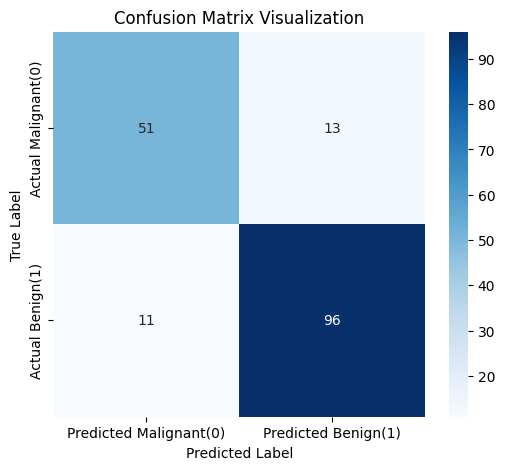

In [8]:
# seaborn 라이브러리를 이용한 히트맵 시각화
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Malignant(0)', 'Predicted Benign(1)'],
            yticklabels=['Actual Malignant(0)', 'Actual Benign(1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Visualization')
plt.show()

In [9]:
# 2. 주요 성능 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n--- 주요 성능 지표 ---")
print(f"정확도 (Accuracy): {accuracy:.4f}")   # (TP + TN) / Total
print(f"정밀도 (Precision): {precision:.4f}")  # TP / (TP + FP)
print(f"재현율 (Recall): {recall:.4f}")  # TP / (TP + FN)
print(f"F1 점수 (F1 Score): {f1:.4f}")  # Harmonic mean of Precision and Recall


--- 주요 성능 지표 ---
정확도 (Accuracy): 0.8596
정밀도 (Precision): 0.8807
재현율 (Recall): 0.8972
F1 점수 (F1 Score): 0.8889


In [10]:
# 3. classification_report() 사용 (한 번에 요약)
# support: 각 클래스의 실제 데이터 개수
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred,
                            target_names=['Malignant(0)', 'Benign(1)']))

print("\n해석:")
print("- Malignant(0) Precision = 0.82: 암(악성) 진단한 경우, 82%는 실제 암이었습니다.")
print("- Malignant(0) Recall = 0.80: 실제 암(악성) 환자 중 80%를 찾아냈습니다. (20%는 놓침)")
print("- Benign(1) Precision = 0.88: 정상(양성) 진단한 경우, 88%는 실제 정상이었습니다.")
print("- Benign(1) Recall = 0.90: 실제 정상(양성) 환자 중 90%를 찾아냈습니다. (10%는 놓침)")


--- Classification Report ---
              precision    recall  f1-score   support

Malignant(0)       0.82      0.80      0.81        64
   Benign(1)       0.88      0.90      0.89       107

    accuracy                           0.86       171
   macro avg       0.85      0.85      0.85       171
weighted avg       0.86      0.86      0.86       171


해석:
- Malignant(0) Precision = 0.82: 암(악성) 진단한 경우, 82%는 실제 암이었습니다.
- Malignant(0) Recall = 0.80: 실제 암(악성) 환자 중 80%를 찾아냈습니다. (20%는 놓침)
- Benign(1) Precision = 0.88: 정상(양성) 진단한 경우, 88%는 실제 정상이었습니다.
- Benign(1) Recall = 0.90: 실제 정상(양성) 환자 중 90%를 찾아냈습니다. (10%는 놓침)


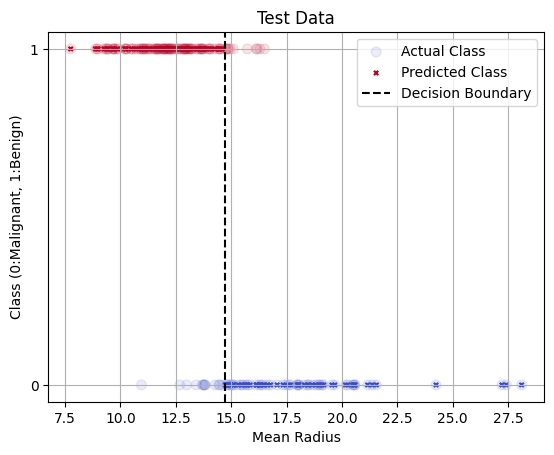


결정 경계: 평균 반지름 약 14.71
=> 이 모델은 평균 반지름이 이 값보다 크면 0(악성), 작으면 1(양성)으로 예측합니다.


In [11]:
# 결과 시각화 (결정 경계 포함)
# Test 데이터 산점도 (실제 정답 기준 색상)
plt.scatter(X_test, y_test, c=y_test, cmap='coolwarm',
            s=50, marker='o', alpha=0.1, label='Actual Class')
# 모델의 예측 결과 기준 색상으로 작은 점 추가 (틀린 예측 확인용)
plt.scatter(X_test, y_pred, c=y_pred, cmap='coolwarm',
            s=10, marker='x', label='Predicted Class')

# 결정 경계(확률=0.5) 계산 및 그리기
# z = Wx + b = 0 인 지점 찾기 -> x = -b / W
decision_boundary = -model.intercept_ / model.coef_[0]
plt.axvline(x=decision_boundary, color='black', linestyle='--',
            label='Decision Boundary')

plt.title("Test Data")
plt.xlabel("Mean Radius")
plt.ylabel("Class (0:Malignant, 1:Benign)")
plt.yticks([0, 1])
plt.legend()
plt.grid(True)
plt.show()

print(f"\n결정 경계: 평균 반지름 약 {decision_boundary[0]:.2f}")
print("=> 이 모델은 평균 반지름이 이 값보다 크면 0(악성), 작으면 1(양성)으로 예측합니다.")

### 5단계: 예측 확률 확인 및 예측

로지스틱 회귀 모델은 내부적으로 확률을 계산합니다.  
`predict()`는 최종 분류 결과(0 또는 1)를 반환하지만,  
`predict_proba()`를 사용하면 각 클래스(0과 1)에 속할 확률값을 직접 볼 수 있습니다.

이를 이용해 5단계 예측을 수행해 봅시다.

In [13]:
# Test 데이터의 첫 5개에 대한 예측 확률 확인
# 결과는 [0일 확률, 1일 확률] 형태로 나옵니다.
probabilities = model.predict_proba(X_test[:5])
print("--- 첫 5개 Test 데이터의 예측 확률 ---")
print("[ 0(악성)일 확률, 1(양성)일 확률 ]")
print(np.round(probabilities, 3)) # 소수점 3자리까지 반올림

# Test 데이터의 첫 5개에 대한 최종 예측 결과 확인
predictions = model.predict(X_test[:5])
print("\n--- 첫 5개 Test 데이터의 최종 예측 ---")
print(predictions)

# 새로운 종양 데이터 예측
# 평균 반지름이 10인 종양
new_tumor_small = np.array([[10]])
pred_small_prob = model.predict_proba(new_tumor_small)
pred_small = model.predict(new_tumor_small)
print(f"\n--- 평균 반지름 10인 종양 ---")
print(f" 예측 확률 [악성, 양성]: {np.round(pred_small_prob[0], 3)}")
print(f" 최종 예측: {'양성(Benign)' if pred_small[0] == 1 else '악성(Malignant)'}")

# 평균 반지름이 20인 종양
new_tumor_large = np.array([[20]])
pred_large_prob = model.predict_proba(new_tumor_large)
pred_large = model.predict(new_tumor_large)
print(f"\n--- 평균 반지름 20인 종양 ---")
print(f" 예측 확률 [악성, 양성]: {np.round(pred_large_prob[0], 3)}")
print(f" 최종 예측: {'양성(Benign)' if pred_large[0] == 1 else '악성(Malignant)'}")

--- 첫 5개 Test 데이터의 예측 확률 ---
[ 0(악성)일 확률, 1(양성)일 확률 ]
[[0.267 0.733]
 [0.147 0.853]
 [0.052 0.948]
 [0.989 0.011]
 [0.44  0.56 ]]

--- 첫 5개 Test 데이터의 최종 예측 ---
[1 1 1 0 1]

--- 평균 반지름 10인 종양 ---
 예측 확률 [악성, 양성]: [0.008 0.992]
 최종 예측: 양성(Benign)

--- 평균 반지름 20인 종양 ---
 예측 확률 [악성, 양성]: [0.996 0.004]
 최종 예측: 악성(Malignant)


```

































```



































